##### Afwa Afini - VIE Data Scientist - Kalbe 
```
Tujuan dari pembuatan model machine learning ini adalah untuk dapat memprediksi total quantity harian dari product yang terjual.


##### Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.core.reshape.merge import merge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

##### Exploratory Data Analysis

In [3]:
# membaca data transaction
df_trs = pd.read_csv('../data-source/DS-Challenge-Transaction.csv')
df_trs

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [4]:
# membaca data product
df_prd = pd.read_csv('../data-source/DS-Challenge-Product.csv')
df_prd

,ProductID,Product_Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


##### Data Preprocessing
##### Merge data

In [5]:
df_merge = df_trs.merge(df_prd, how = 'left', on = ['ProductID', 'Price'])
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product_Name
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Yoghurt
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Choco Bar
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Choco Bar
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Yoghurt
...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,Cheese Stick
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,Ginger Candy
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,Coffee Candy
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,Oat


In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
 8   Product_Name   5020 non-null   object
dtypes: int64(5), object(4)
memory usage: 353.1+ KB


##### Transformasi Data

In [7]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format='%d/%m/%Y')

In [8]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   Product_Name   5020 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 353.1+ KB


In [9]:
# set 'Date' menjadi indeks
df_merge.set_index('Date', inplace=True)

In [10]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2022-01-01 to 2022-12-31
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   ProductID      5020 non-null   object
 3   Price          5020 non-null   int64 
 4   Qty            5020 non-null   int64 
 5   TotalAmount    5020 non-null   int64 
 6   StoreID        5020 non-null   int64 
 7   Product_Name   5020 non-null   object
dtypes: int64(5), object(3)
memory usage: 353.0+ KB


##### Membuat data baru untuk regresi

In [34]:
daily_data = df_merge.groupby(df_merge.index.date)['Qty'].sum().reset_index()
daily_data.columns = ['Date', 'TotalQty']

# transformasi tipe data dari kolom 'Date'
daily_data['Date'] = pd.to_datetime(daily_data['Date'], format='%d/%m/%Y')
daily_data.info()
daily_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      365 non-null    datetime64[ns]
 1   TotalQty  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


,Date,TotalQty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


##### Visualisasi data

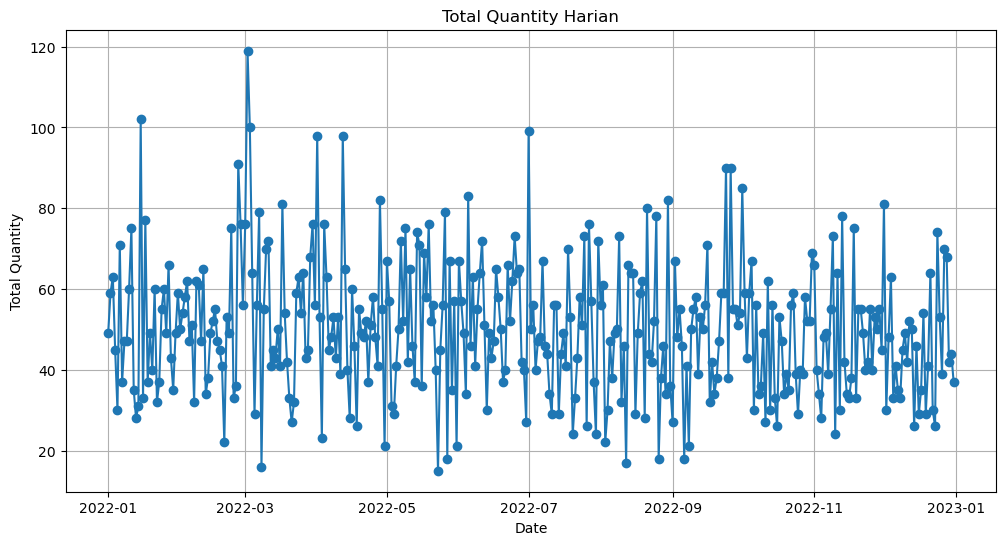

In [35]:
plt.figure(figsize=(12,6))
plt.plot(daily_data['Date'], daily_data['TotalQty'], marker='o', linestyle='-')
plt.title('Total Quantity Harian')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

##### Membuat Data Latih dan Data Uji

In [56]:
# Data latih
train_data = daily_data.iloc[:-30]

# Data uji (30 hari terakhir)
test_data = daily_data.iloc[-30:]

##### Membangun Model ARIMA

In [63]:
model = ARIMA(train_data['TotalQty'], order=(1,1,1))
model_fit = model.fit()

# Model melakukan prediksi
# predict_result = model_fit.predict(steps=len(test_data))
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

##### Membuat Visualisasi Perbandingan

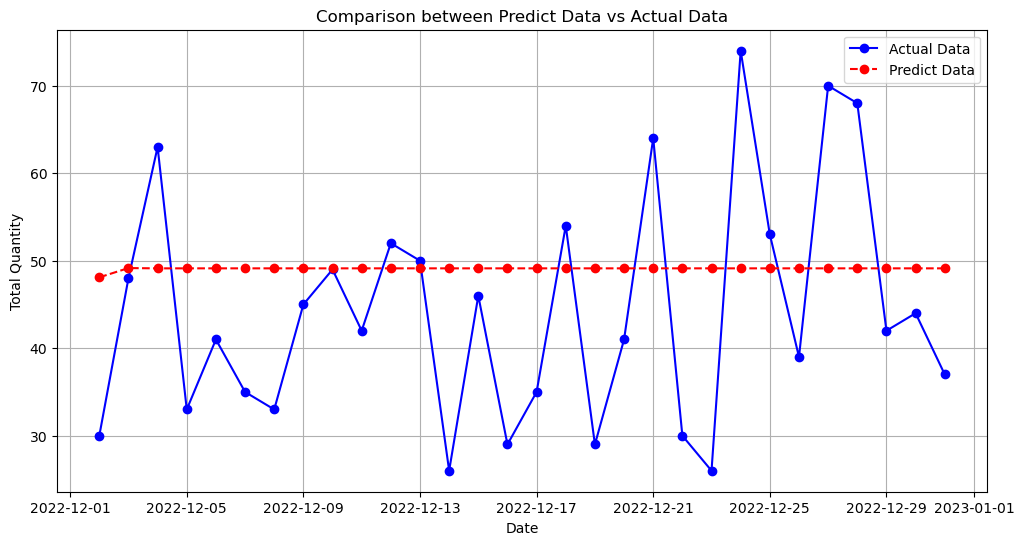

In [61]:
plt.figure(figsize=(12,6))
plt.plot(test_data['Date'], test_data['TotalQty'], label='Actual Data', color='b', marker='o', linestyle='-')
plt.plot(test_data['Date'], predictions, label='Predict Data', color='r', marker='o', linestyle='--')
plt.title("Comparison between Predict Data vs Actual Data")
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.legend()
plt.show()

##### Evaluasi Model

In [50]:
# menghitung MSE (Mean Square Error)
mse = mean_squared_error(test_data['TotalQty'], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 196.7589338198775
